In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

In [3]:
data = pd.read_csv('transactions_n100000.csv')

data.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x7901ee,2019-01-16 18:33:00,7,shake,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,burger,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,fries,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salad,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,fries,1,41.884490,-87.627059


In [4]:
data.shape

(260645, 7)

In [6]:
len(data['ticket_id'].unique())

100000

In [7]:
len(data['order_timestamp'].unique())

76799

In [8]:
len(data['location'].unique())

9

In [9]:
len(data['item_name'].unique())

4

In [10]:
dataset = pd.pivot_table(data, index= 'ticket_id', columns ='item_name', values='item_count', aggfunc = np.sum)

dataset.shape

(100000, 4)

In [11]:
data.drop_duplicates(subset=['ticket_id', 'order_timestamp', 'location', 'lat', 'long'], inplace=True)

data.shape

(100000, 7)

In [12]:
dataset = pd.merge(dataset, data[['ticket_id', 'order_timestamp', 'location', 'lat', 'long']], on='ticket_id', how='left')

dataset.shape

(100000, 9)

In [13]:
dataset.fillna(0, inplace=True)

dataset.head()

,ticket_id,burger,fries,salad,shake,order_timestamp,location,lat,long
0,0x10000a,1.0,1.0,0.0,0.0,2019-01-29 00:48:00,9,41.524598,-87.849468
1,0x100058,2.0,2.0,0.0,0.0,2019-05-05 00:08:00,6,41.784576,-87.607565
2,0x1000c8,4.0,5.0,1.0,4.0,2019-01-28 19:24:00,9,41.524598,-87.849468
3,0x10014c,1.0,1.0,0.0,0.0,2019-02-23 00:15:00,6,41.784576,-87.607565
4,0x1001d8,3.0,3.0,0.0,3.0,2019-06-30 17:50:00,2,42.049306,-87.677606


In [27]:
dataset.to_csv('transaction.csv')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

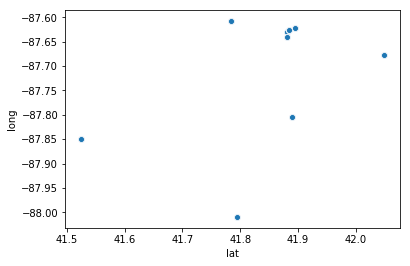

In [15]:
ax = sns.scatterplot(x="lat", y="long", data=dataset)

plt.show()

In [16]:
dataset['order_timestamp'] = pd.to_datetime(dataset['order_timestamp'])

In [17]:
dataset['dow'] = [i.weekday() for i in dataset['order_timestamp']]

dataset['year'] = [i.year for i in dataset['order_timestamp']]

dataset['month'] = [i.month for i in dataset['order_timestamp']]

dataset['day'] = [i.day for i in dataset['order_timestamp']]

dataset['hour'] = [i.hour for i in dataset['order_timestamp']]

dataset.head()

,ticket_id,burger,fries,salad,shake,order_timestamp,location,lat,long,dow,year,month,day,hour
0,0x10000a,1.0,1.0,0.0,0.0,2019-01-29 00:48:00,9,41.524598,-87.849468,1,2019,1,29,0
1,0x100058,2.0,2.0,0.0,0.0,2019-05-05 00:08:00,6,41.784576,-87.607565,6,2019,5,5,0
2,0x1000c8,4.0,5.0,1.0,4.0,2019-01-28 19:24:00,9,41.524598,-87.849468,0,2019,1,28,19
3,0x10014c,1.0,1.0,0.0,0.0,2019-02-23 00:15:00,6,41.784576,-87.607565,5,2019,2,23,0
4,0x1001d8,3.0,3.0,0.0,3.0,2019-06-30 17:50:00,2,42.049306,-87.677606,6,2019,6,30,17


In [23]:
dataset['hour'].unique()

array([ 0, 19, 17, 18, 12, 11,  1, 13, 20, 23, 14, 16, 15, 21, 22])

In [35]:
monthly = pd.pivot_table(dataset, index=['location','month'], values=['ticket_id', 'burger', 'fries', 'salad', 'shake'],
                        aggfunc = {'ticket_id':len, 'burger':np.sum, 'fries':np.sum, 
                                   'salad':np.sum, 'shake':np.sum})

monthly.reset_index(drop=False, inplace = True)

monthly

,location,month,burger,fries,salad,shake,ticket_id
0,1,1,668.0,1826.0,1158.0,376.0,745
1,1,2,589.0,1644.0,1055.0,396.0,692
2,1,3,558.0,1663.0,1105.0,301.0,715
3,1,4,663.0,1735.0,1072.0,381.0,724
4,1,5,685.0,1791.0,1106.0,420.0,747
5,1,6,590.0,1591.0,1001.0,350.0,665
6,1,7,598.0,1785.0,1187.0,318.0,765
7,1,8,563.0,1588.0,1025.0,330.0,687
8,1,9,612.0,1689.0,1077.0,354.0,695
9,1,10,641.0,1719.0,1078.0,376.0,727


In [37]:
monthly.to_excel('monthly_transaction.xlsx')

In [38]:
dow = pd.pivot_table(dataset, index=['location','dow'], values=['ticket_id', 'burger', 'fries', 'salad', 'shake'],
                        aggfunc = {'ticket_id':len, 'burger':np.sum, 'fries':np.sum, 
                                   'salad':np.sum, 'shake':np.sum})

dow.reset_index(drop=False, inplace = True)

dow

,location,dow,burger,fries,salad,shake,ticket_id
0,1,0,1049.0,2987.0,1938.0,625.0,1262
1,1,1,1083.0,2929.0,1846.0,650.0,1222
2,1,2,1014.0,2896.0,1882.0,590.0,1224
3,1,3,1098.0,2889.0,1791.0,620.0,1222
4,1,4,1167.0,3099.0,1932.0,706.0,1290
5,1,5,1034.0,2828.0,1794.0,634.0,1208
6,1,6,925.0,2702.0,1777.0,487.0,1137
7,2,0,3762.0,4195.0,433.0,1025.0,2178
8,2,1,4008.0,4494.0,486.0,1101.0,2310
9,2,2,3873.0,4322.0,449.0,1088.0,2206


In [39]:
dow.to_excel('dow_transaction.xlsx')

In [42]:
hourly = pd.pivot_table(dataset, index=['location','hour'], values=['ticket_id', 'burger', 'fries', 'salad', 'shake'],
                        aggfunc = {'ticket_id':len, 'burger':np.sum, 'fries':np.sum, 
                                   'salad':np.sum, 'shake':np.sum})

hourly.reset_index(drop=False, inplace = True)

hourly

,location,hour,burger,fries,salad,shake,ticket_id
0,1,0,1219.0,1303.0,84.0,223.0,701
1,1,1,271.0,351.0,80.0,55.0,181
2,1,11,552.0,3602.0,3050.0,183.0,1595
3,1,12,846.0,5766.0,4920.0,282.0,2532
4,1,13,552.0,3766.0,3214.0,203.0,1679
5,1,14,134.0,979.0,845.0,51.0,436
6,1,15,51.0,170.0,119.0,36.0,72
7,1,16,158.0,232.0,74.0,145.0,75
8,1,17,902.0,1028.0,126.0,829.0,293
9,1,18,1329.0,1429.0,100.0,1262.0,396


In [43]:
hourly.to_excel('hourly_transaction.xlsx')

## Clustering

In [44]:
dataset.head()

,ticket_id,burger,fries,salad,shake,order_timestamp,location,lat,long,dow,year,month,day,hour
0,0x10000a,1.0,1.0,0.0,0.0,2019-01-29 00:48:00,9,41.524598,-87.849468,1,2019,1,29,0
1,0x100058,2.0,2.0,0.0,0.0,2019-05-05 00:08:00,6,41.784576,-87.607565,6,2019,5,5,0
2,0x1000c8,4.0,5.0,1.0,4.0,2019-01-28 19:24:00,9,41.524598,-87.849468,0,2019,1,28,19
3,0x10014c,1.0,1.0,0.0,0.0,2019-02-23 00:15:00,6,41.784576,-87.607565,5,2019,2,23,0
4,0x1001d8,3.0,3.0,0.0,3.0,2019-06-30 17:50:00,2,42.049306,-87.677606,6,2019,6,30,17


In [45]:
#增加小时时间段的dummy

dataset['11-13'] = 0
dataset['14-16'] = 0
dataset['17-19'] = 0
dataset['20-22'] = 0
dataset['23-1'] = 0

for index,row in dataset.iterrows():
    if row['hour'] in [11,12,13]:
        dataset.at[index, '11-13'] = 1
    elif row['hour'] in [14,15,16]:
        dataset.at[index, '14-16'] = 1
    elif row['hour'] in [17,18,19]:
        dataset.at[index, '17-19'] = 1
    elif row['hour'] in [20,21,22]:
        dataset.at[index, '20-22'] = 1
    elif row['hour'] in [23,0,1]:
        dataset.at[index, '23-1'] = 1

dataset.head()

,ticket_id,burger,fries,salad,shake,order_timestamp,location,lat,long,dow,year,month,day,hour,11-13,14-16,17-19,20-22,23-1
0,0x10000a,1.0,1.0,0.0,0.0,2019-01-29 00:48:00,9,41.524598,-87.849468,1,2019,1,29,0,0,0,0,0,1
1,0x100058,2.0,2.0,0.0,0.0,2019-05-05 00:08:00,6,41.784576,-87.607565,6,2019,5,5,0,0,0,0,0,1
2,0x1000c8,4.0,5.0,1.0,4.0,2019-01-28 19:24:00,9,41.524598,-87.849468,0,2019,1,28,19,0,0,1,0,0
3,0x10014c,1.0,1.0,0.0,0.0,2019-02-23 00:15:00,6,41.784576,-87.607565,5,2019,2,23,0,0,0,0,0,1
4,0x1001d8,3.0,3.0,0.0,3.0,2019-06-30 17:50:00,2,42.049306,-87.677606,6,2019,6,30,17,0,0,1,0,0


In [46]:
#增加location的dummy

dataset['central'] = 0
dataset['station&parking'] = 0
dataset['sub'] = 0
dataset['university'] = 0

for index,row in dataset.iterrows():
    if row['location'] in [1,3,7]:
        dataset.at[index, 'central'] = 1
    elif row['location'] in [5,6]:
        dataset.at[index, 'station&parking'] = 1
    elif row['location'] in [4,9]:
        dataset.at[index, 'sub'] = 1
    elif row['location'] in [2,8]:
        dataset.at[index, 'university'] = 1

dataset.head()

,ticket_id,burger,fries,salad,shake,order_timestamp,location,lat,long,dow,...,hour,11-13,14-16,17-19,20-22,23-1,central,station&parking,sub,university
0,0x10000a,1.0,1.0,0.0,0.0,2019-01-29 00:48:00,9,41.524598,-87.849468,1,...,0,0,0,0,0,1,0,0,1,0
1,0x100058,2.0,2.0,0.0,0.0,2019-05-05 00:08:00,6,41.784576,-87.607565,6,...,0,0,0,0,0,1,0,1,0,0
2,0x1000c8,4.0,5.0,1.0,4.0,2019-01-28 19:24:00,9,41.524598,-87.849468,0,...,19,0,0,1,0,0,0,0,1,0
3,0x10014c,1.0,1.0,0.0,0.0,2019-02-23 00:15:00,6,41.784576,-87.607565,5,...,0,0,0,0,0,1,0,1,0,0
4,0x1001d8,3.0,3.0,0.0,3.0,2019-06-30 17:50:00,2,42.049306,-87.677606,6,...,17,0,0,1,0,0,0,0,0,1


In [47]:
#增加location的dummy

dataset['location_1_3_5_8'] = 0
dataset['location_2_4_6_7_9'] = 0

for index,row in dataset.iterrows():
    if row['location'] in [1,3,5,8]:
        dataset.at[index, 'location_1_3_5_8'] = 1
    elif row['location'] in [2,4,6,7,9]:
        dataset.at[index, 'location_2_4_6_7_9'] = 1

dataset.head()

,ticket_id,burger,fries,salad,shake,order_timestamp,location,lat,long,dow,...,14-16,17-19,20-22,23-1,central,station&parking,sub,university,location_1_3_5_8,location_2_4_6_7_9
0,0x10000a,1.0,1.0,0.0,0.0,2019-01-29 00:48:00,9,41.524598,-87.849468,1,...,0,0,0,1,0,0,1,0,0,1
1,0x100058,2.0,2.0,0.0,0.0,2019-05-05 00:08:00,6,41.784576,-87.607565,6,...,0,0,0,1,0,1,0,0,0,1
2,0x1000c8,4.0,5.0,1.0,4.0,2019-01-28 19:24:00,9,41.524598,-87.849468,0,...,0,1,0,0,0,0,1,0,0,1
3,0x10014c,1.0,1.0,0.0,0.0,2019-02-23 00:15:00,6,41.784576,-87.607565,5,...,0,0,0,1,0,1,0,0,0,1
4,0x1001d8,3.0,3.0,0.0,3.0,2019-06-30 17:50:00,2,42.049306,-87.677606,6,...,0,1,0,0,0,0,0,1,0,1


In [48]:
from sklearn.cluster import KMeans

In [49]:
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

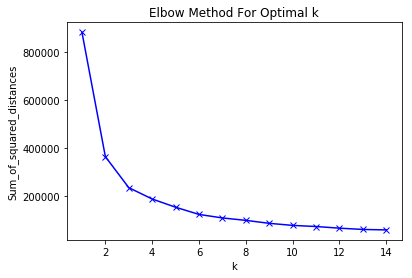

In [50]:
df_1 = dataset[['burger','fries','salad','shake', '11-13','14-16', '17-19', '20-22', '23-1']]

fitting(df_1)

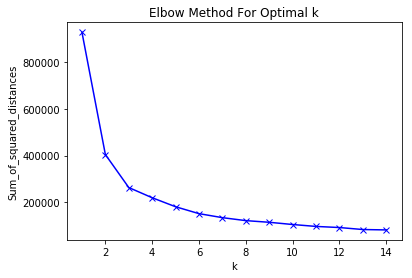

In [52]:
df_2 = dataset[['burger','fries','salad','shake', '11-13','14-16', '17-19', '20-22', '23-1', 
                'location_1_3_5_8', 'location_2_4_6_7_9']]

fitting(df_2)

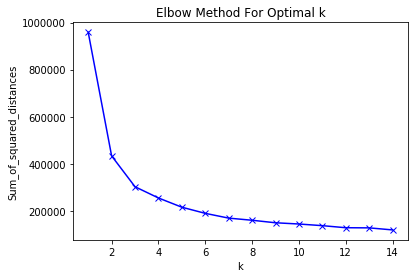

In [53]:
df_3 = dataset[['burger','fries','salad','shake', '11-13','14-16', '17-19', '20-22', '23-1', 'central', 'station&parking',
               'sub', 'university']]

fitting(df_3)

optimal cluster is 3/4

In [76]:
kmeans = KMeans(n_clusters = 3, random_state=0).fit(df_3)

x = pd.DataFrame(kmeans.cluster_centers_, columns = ['burger','fries','salad','shake', '11-14','14-17', 
                                                     '17-20', '20-23', '23-2', 'cbd', 'station&parking',
               'suburban-center', 'university_area'])

In [77]:
x

,burger,fries,salad,shake,11-14,14-17,17-20,20-23,23-2,cbd,station&parking,suburban-center,university_area
0,3.885765,4.058421,0.172656,3.323750,0.001431,0.057944,0.772230,0.058835,0.109560,0.303365,0.102531,0.487120,0.106984
1,1.200806,1.471092,0.270285,0.363503,0.241170,0.029156,0.096795,0.013131,0.619748,0.212076,0.332175,0.115715,0.340033
2,0.273767,2.880075,2.606308,0.092494,0.875718,0.080214,0.017380,0.012923,0.013765,0.437661,0.237473,0.084225,0.240642


In [79]:
x['burger'] = [round(i,1) for i in x['burger']]
x['fries'] = [round(i,1) for i in x['fries']]
x['salad'] = [round(i,1) for i in x['salad']]
x['shake'] = [round(i,1) for i in x['shake']]
x['11-14'] = [round(i,2) for i in x['11-14']]
x['14-17'] = [round(i,2) for i in x['14-17']]
x['17-20'] = [round(i,2) for i in x['17-20']]
x['20-23'] = [round(i,2) for i in x['20-23']]
x['23-2'] = [round(i,2) for i in x['23-2']]
x['cbd'] = [round(i,2) for i in x['cbd']]
x['station&parking'] = [round(i,2) for i in x['station&parking']]
x['suburban-center'] = [round(i,2) for i in x['suburban-center']]
x['university_area'] = [round(i,2) for i in x['university_area']]
x

,burger,fries,salad,shake,11-14,14-17,17-20,20-23,23-2,cbd,station&parking,suburban-center,university_area
0,3.9,4.1,0.2,3.3,0.00,0.06,0.77,0.06,0.11,0.30,0.10,0.49,0.11
1,1.2,1.5,0.3,0.4,0.24,0.03,0.10,0.01,0.62,0.21,0.33,0.12,0.34
2,0.3,2.9,2.6,0.1,0.88,0.08,0.02,0.01,0.01,0.44,0.24,0.08,0.24


In [58]:
kmeans = KMeans(n_clusters = 4, random_state=0).fit(df_3)

y = pd.DataFrame(kmeans.cluster_centers_, columns = ['burger','fries','salad','shake', '11-13','14-16', '17-19', '20-22', '23-1', 'central', 'station&parking',
               'sub', 'university'])

In [59]:
y

,burger,fries,salad,shake,11-13,14-16,17-19,20-22,23-1,central,station&parking,sub,university
0,1.063820,1.351897,0.288077,0.226586,0.264459,0.026367,0.046375,0.009131,0.653670,0.208325,0.348776,0.086833,0.356066
1,2.974233,3.237353,0.263120,1.995826,0.021259,0.048417,0.607880,0.045857,0.276587,0.262619,0.166398,0.399466,0.171518
2,0.265676,2.874248,2.608572,0.087713,0.877977,0.079907,0.015961,0.012779,0.013376,0.437969,0.237581,0.083288,0.241162
3,4.283141,4.366356,0.083215,4.034550,0.000053,0.065466,0.846843,0.067046,0.020593,0.324591,0.070680,0.528414,0.076315


In [60]:
dataset.head()

,ticket_id,burger,fries,salad,shake,order_timestamp,location,lat,long,dow,...,14-16,17-19,20-22,23-1,central,station&parking,sub,university,location_1_3_5_8,location_2_4_6_7_9
0,0x10000a,1.0,1.0,0.0,0.0,2019-01-29 00:48:00,9,41.524598,-87.849468,1,...,0,0,0,1,0,0,1,0,0,1
1,0x100058,2.0,2.0,0.0,0.0,2019-05-05 00:08:00,6,41.784576,-87.607565,6,...,0,0,0,1,0,1,0,0,0,1
2,0x1000c8,4.0,5.0,1.0,4.0,2019-01-28 19:24:00,9,41.524598,-87.849468,0,...,0,1,0,0,0,0,1,0,0,1
3,0x10014c,1.0,1.0,0.0,0.0,2019-02-23 00:15:00,6,41.784576,-87.607565,5,...,0,0,0,1,0,1,0,0,0,1
4,0x1001d8,3.0,3.0,0.0,3.0,2019-06-30 17:50:00,2,42.049306,-87.677606,6,...,0,1,0,0,0,0,0,1,0,1


In [61]:
daily = pd.pivot_table(dataset, index=['month','day'], values=['burger', 'fries', 'salad', 'shake', 'location'],
                      aggfunc = {'location':len, 'burger':np.sum, 'fries':np.sum, 
                                   'salad':np.sum, 'shake':np.sum})

daily

burger  fries  location  salad  shake
month day                                       
1     1     531.0  711.0       268  180.0  351.0
      2     522.0  684.0       259  162.0  354.0
      3     570.0  824.0       311  254.0  412.0
      4     509.0  726.0       278  217.0  351.0
      5     535.0  738.0       272  203.0  383.0
      6     489.0  671.0       261  182.0  351.0
      7     602.0  775.0       297  173.0  420.0
      8     535.0  759.0       294  224.0  363.0
      9     532.0  734.0       284  202.0  364.0
      10    559.0  739.0       290  180.0  351.0
      11    509.0  721.0       280  212.0  336.0
      12    619.0  789.0       314  170.0  425.0
      13    484.0  679.0       252  195.0  328.0
      14    587.0  770.0       291  183.0  396.0
      15    543.0  790.0       290  247.0  385.0
      16    582.0  759.0       284  177.0  377.0
      17    447.0  642.0       252  195.0  303.0
      18    536.0  727.0       282  191.0  365.0
      19    446.0  640.0       264  194.0  287.0
      20    499.0  688.0       269  189.0  320.0
      21    542.0  711.0       275  169.0  341.0
      22    461.0  682.0       269  221.0  316.0
      23    502.0  665.0       268  163.0  324.0
      24    539.0  727.0       277  188.0  355.0
      25    452.0  625.0       242  173.0  318.0
      26    470.0  674.0       271  204.0  304.0
      27    532.0  761.0       293  229.0  344.0
      28    516.0  731.0       280  215.0  355.0
      29    496.0  677.0       268  181.0  343.0
      30    414.0  612.0       246  198.0  271.0
...           ...    ...       ...    ...    ...
12    1     501.0  703.0       290  202.0  310.0
      2     420.0  575.0       232  155.0  280.0
      3     537.0  732.0       281  195.0  379.0
      4     489.0  658.0       273  169.0  335.0
      5     518.0  688.0       271  170.0  337.0
      6     510.0  746.0       289  236.0  357.0
      7     519.0  696.0       266  177.0  345.0
      8     523.0  714.0       294  191.0  334.0
      9     475.0  664.0       254  189.0  303.0
      10    438.0  625.0       262  187.0  287.0
      11    455.0  665.0       256  210.0  295.0
      12    507.0  684.0       264  177.0  332.0
      13    478.0  677.0       258  199.0  330.0
      14    571.0  732.0       293  161.0  389.0
      15    524.0  691.0       268  167.0  326.0
      16    469.0  683.0       276  214.0  306.0
      17    525.0  695.0       258  170.0  383.0
      18    524.0  697.0       273  173.0  327.0
      19    502.0  664.0       254  162.0  351.0
      20    465.0  641.0       263  176.0  282.0
      21    488.0  682.0       276  194.0  329.0
      22    492.0  683.0       271  191.0  315.0
      23    669.0  907.0       342  238.0  460.0
      24    501.0  712.0       281  211.0  310.0
      25    465.0  626.0       265  161.0  288.0
      26    499.0  677.0       276  178.0  303.0
      27    483.0  668.0       266  185.0  300.0
      28    522.0  710.0       265  188.0  371.0
      29    520.0  720.0       278  200.0  339.0
      30    611.0  825.0       309  214.0  431.0

[364 rows x 5 columns]

In [65]:
daily.sort_values('location', inplace=True, ascending=False)

daily.head()

burger  fries  location  salad  shake
month day                                       
12    23    669.0  907.0       342  238.0  460.0
11    15    680.0  905.0       323  225.0  471.0
5     22    589.0  828.0       323  239.0  387.0
      12    595.0  819.0       322  224.0  411.0
8     6     531.0  810.0       317  279.0  320.0

In [66]:
daily.sort_values('burger', inplace=True, ascending=False)

daily.head()

,,burger,fries,location,salad,shake
month,day,,,,,
11,15,680.0,905.0,323,225.0,471.0
12,23,669.0,907.0,342,238.0,460.0
11,7,620.0,837.0,301,217.0,427.0
1,12,619.0,789.0,314,170.0,425.0
4,27,612.0,834.0,313,222.0,413.0


In [67]:
daily.sort_values('fries', inplace=True, ascending=False)

daily.head()

burger  fries  location  salad  shake
month day                                       
12    23    669.0  907.0       342  238.0  460.0
11    15    680.0  905.0       323  225.0  471.0
      7     620.0  837.0       301  217.0  427.0
4     27    612.0  834.0       313  222.0  413.0
8     30    607.0  831.0       308  224.0  420.0

In [68]:
daily.sort_values('salad', inplace=True, ascending=False)

daily.head()

burger  fries  location  salad  shake
month day                                       
8     6     531.0  810.0       317  279.0  320.0
7     23    511.0  771.0       310  260.0  329.0
1     3     570.0  824.0       311  254.0  412.0
      15    543.0  790.0       290  247.0  385.0
4     6     463.0  707.0       285  244.0  309.0

In [69]:
daily.sort_values('shake', inplace=True, ascending=False)

daily.head()

,,burger,fries,location,salad,shake
month,day,,,,,
11,15,680.0,905.0,323,225.0,471.0
12,23,669.0,907.0,342,238.0,460.0
9,8,602.0,788.0,285,186.0,439.0
12,30,611.0,825.0,309,214.0,431.0
11,7,620.0,837.0,301,217.0,427.0
